# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [3]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn

# read in our data
capteur_riviere = pd.read_csv("C:/Users/louis/OneDrive/Bureau/Mines/2A/trimestre 3/MOLONARI/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv")
capteur_ZH = pd.read_csv("C:/Users/louis/OneDrive/Bureau/Mines/2A/trimestre 3/MOLONARI/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures_modified.csv")
etalonage_capteur_riv = pd.read_csv("C:/Users/louis/OneDrive/Bureau/Mines/2A/trimestre 3/MOLONARI/MOLONARI_1D_RESOURCES/configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [4]:
capteur_riviere = capteur_riviere.rename(columns = {'Titre de tracé : point_montberneux':'Index','Unnamed: 1': 'dates', 'Unnamed: 2': 'tension_V', 'Unnamed: 3': 'temperature_stream_C'})
capteur_riviere.set_index('Index', inplace = True)

In [5]:
capteur_riviere

,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6
Index,,,,,,
1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN
2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN
3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN
4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN
5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN
...,...,...,...,...,...,...
1447.0,07/12/2016 15:45,1.13668,9.126,NaN,NaN,NaN
1447.7,07/12/2016 16:00,1.33513,9.157,NaN,NaN,NaN
1448.4,07/12/2016 16:15,1.38926,9.199,NaN,NaN,NaN


In [6]:
capteur_ZH.columns = ['#','dates', 'temperature_depth_1_C','temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C', 'Hôte connecté (LGR S/N: 10117166)', 'Arrêté (LGR S/N: 10117166)',
       'Fin de fichier (LGR S/N: 10117166)']

In [7]:
capteur_ZH.head()

,#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C,Hôte connecté (LGR S/N: 10117166),Arrêté (LGR S/N: 10117166),Fin de fichier (LGR S/N: 10117166)
0,1,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810,NaN,NaN,NaN
1,2,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834,NaN,NaN,NaN
2,3,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002,NaN,NaN,NaN
3,4,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954,NaN,NaN,NaN
4,5,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954,NaN,NaN,NaN


# Transformez les données de différence de charge en mètres



$dH = \frac{dU-dT*\frac{dU}{dT} - Intercept}{\frac{dU}{dH}}$

In [8]:
Intercept = 1.210344
dU_dH = -1.462495
dU_dT = 0.001474

In [9]:
capteur_riviere['tension_V']=pd.to_numeric(capteur_riviere['tension_V'], errors  ='coerce')
capteur_riviere['temperature_stream_C']=pd.to_numeric(capteur_riviere['temperature_stream_C'], errors  ='coerce')

In [10]:
capteur_riviere['charge'] = (capteur_riviere['tension_V'] - capteur_riviere['temperature_stream_C']*dU_dT - Intercept)/dU_dH
capteur_riviere.head()

,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge
Index,,,,,,,
1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848
2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499
3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578
4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873
5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN,-0.009189


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [11]:
print(capteur_riviere['dates'].head(), capteur_ZH['dates'].head())

Index
1.0    06/27/16 12:00:00 PM
2.0    06/27/16 12:15:00 PM
3.0    06/27/16 12:30:00 PM
4.0    06/27/16 12:45:00 PM
5.0    06/27/16 01:00:00 PM
Name: dates, dtype: object 0    06/27/16 12:00:00 PM
1    06/27/16 12:15:00 PM
2    06/27/16 12:30:00 PM
3    06/27/16 12:45:00 PM
4    06/27/16 01:00:00 PM
Name: dates, dtype: object


Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [12]:
# check the data type of our date column

In [13]:
capteur_riviere['dates']

Index
1.0       06/27/16 12:00:00 PM
2.0       06/27/16 12:15:00 PM
3.0       06/27/16 12:30:00 PM
4.0       06/27/16 12:45:00 PM
5.0       06/27/16 01:00:00 PM
                  ...         
1447.0        07/12/2016 15:45
1447.7        07/12/2016 16:00
1448.4        07/12/2016 16:15
1449.1        07/12/2016 16:30
1449.8        07/12/2016 16:45
Name: dates, Length: 1460, dtype: object

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [14]:
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH.dates, infer_datetime_format=True)

In [15]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere.dates,format = "%Y/%m/%d %I:%M:%S", infer_datetime_format = True)

In [16]:
pd.set_option('display.max_rows', None)
capteur_riviere.head()

,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge
Index,,,,,,,
1.0,2016-06-27 12:00:00,1.26787,18.342,NaN,NaN,NaN,-0.020848
2.0,2016-06-27 12:15:00,1.06630,13.898,NaN,NaN,NaN,0.112499
3.0,2016-06-27 12:30:00,1.20661,13.915,NaN,NaN,NaN,0.016578
4.0,2016-06-27 12:45:00,1.24533,13.939,NaN,NaN,NaN,-0.009873
5.0,2016-06-27 13:00:00,1.24437,13.967,NaN,NaN,NaN,-0.009189


Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

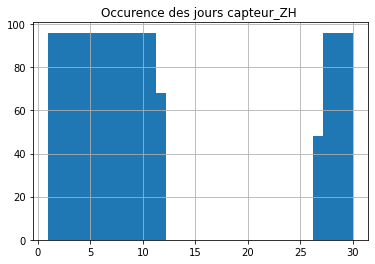

In [17]:
capteur_riviere['jour'] = capteur_riviere['dates'].apply(lambda x: x.day)
capteur_riviere.hist(column = ['jour'],bins=31)
plt.title('Occurence des jours capteur_ZH ');

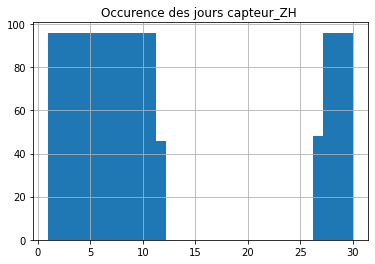

In [18]:
capteur_ZH['jour'] = capteur_ZH['dates'].apply(lambda x: x.day);
capteur_ZH.hist(column = ['jour'],bins=31);
plt.title('Occurence des jours capteur_ZH ');

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




In [19]:
capteur_riviere.describe()

,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge,jour
count,1460.000000,1460.000000,0.0,0.0,0.0,1460.000000,1460.000000
mean,1.256888,14.896441,NaN,NaN,NaN,-0.016812,11.506849
std,0.047302,1.142397,NaN,NaN,NaN,0.032176,9.880885
min,0.652670,9.066000,NaN,NaN,NaN,-0.140099,1.000000
25%,1.246590,14.203750,NaN,NaN,NaN,-0.025327,4.000000
50%,1.262150,14.818000,NaN,NaN,NaN,-0.020557,8.000000
75%,1.270010,15.555000,NaN,NaN,NaN,-0.009784,12.000000
max,1.432100,18.342000,NaN,NaN,NaN,0.390494,30.000000


In [20]:
capteur_ZH.describe()

,#,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C,jour
count,1438.000000,1436.000000,1436.000000,1436.000000,1436.000000,1438.000000
mean,719.500000,14.717557,14.502795,14.348946,14.097808,11.499305
std,415.259156,0.721799,0.531472,0.423288,0.328507,9.956045
min,1.000000,13.329000,13.642000,13.762000,13.690000,1.000000
25%,360.250000,14.146000,14.098000,14.050000,13.882000,4.000000
50%,719.500000,14.625000,14.409000,14.242000,14.002000,8.000000
75%,1078.750000,15.127000,14.768000,14.505000,14.194000,12.000000
max,1438.000000,17.320000,17.296000,17.034000,17.130000,30.000000


## Tracez les graphiques de distribution pour les différentes variables

## 1. Box plot

Le box plot est une manière standardisée d'afficher la distribution des données sur la base du résumé en cinq chiffres (minimum, premier quartile (Q1), médiane, troisième quartile (Q3) et maximum). Elle est souvent utilisée pour identifier la distribution des données et détecter les valeurs aberrantes. La ligne de code ci-dessous trace le box plot de la variable numérique 'Loan_amount'. 

**1) Capteur ZH**

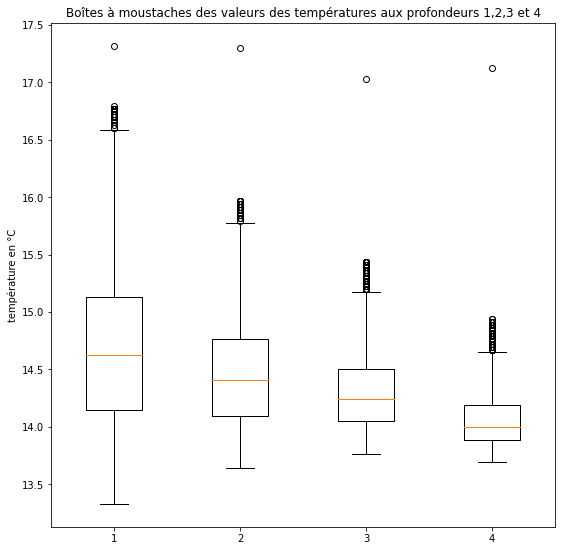

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
data = []
names=[]
for i in range(4):
    dat = [x for x in capteur_ZH[f'temperature_depth_{i+1}_C'].values if pd.isnull(x)==False]
    data.append(dat)
    names.append(f'Temperature à la profondeur {i+1}')
ax.boxplot(data)
plt.ylabel('température en °C')
plt.title('Boîtes à moustaches des valeurs des températures aux profondeurs 1,2,3 et 4')
plt.show()

Tous les cercles sont en fait des valeurs aberrantes hors de l'intervalle : $[Q1-1.5*IQ; Q3+1.5*IQ]$

**2) Capteur_ rivière**

In [58]:
capteur_riviere.head()

,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge,jour
Index,,,,,,,,
1.0,2016-06-27 12:00:00,1.26787,18.342,NaN,NaN,NaN,-0.020848,27
2.0,2016-06-27 12:15:00,1.06630,13.898,NaN,NaN,NaN,0.112499,27
3.0,2016-06-27 12:30:00,1.20661,13.915,NaN,NaN,NaN,0.016578,27
4.0,2016-06-27 12:45:00,1.24533,13.939,NaN,NaN,NaN,-0.009873,27
5.0,2016-06-27 13:00:00,1.24437,13.967,NaN,NaN,NaN,-0.009189,27


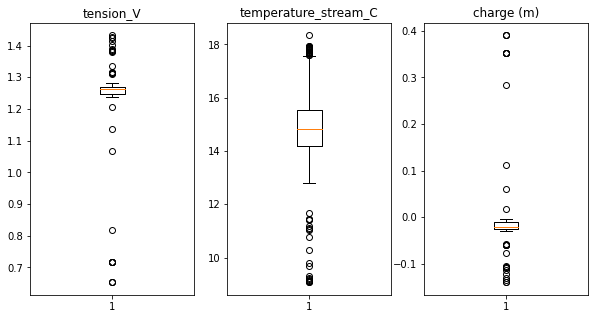

In [59]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 5))
ax1.boxplot([x for x in capteur_riviere['tension_V'].values if pd.isnull(x)==False])
ax1.set_title('tension_V')
ax2.boxplot([x for x in capteur_riviere['temperature_stream_C'].values if pd.isnull(x)==False])
ax2.set_title('temperature_stream_C')
ax3.boxplot([x for x in capteur_riviere['charge'].values if pd.isnull(x)==False])
ax3.set_title('charge (m)');

## 2. Histogramme

Un histogramme est utilisé pour visualiser la distribution d'une variable numérique. Une valeur aberrante apparaît en dehors du modèle général de distribution. La ligne de code ci-dessous trace un histogramme de la variable 'Revenu', en utilisant la fonction hist(). A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'Income' variable, using the hist() function. 

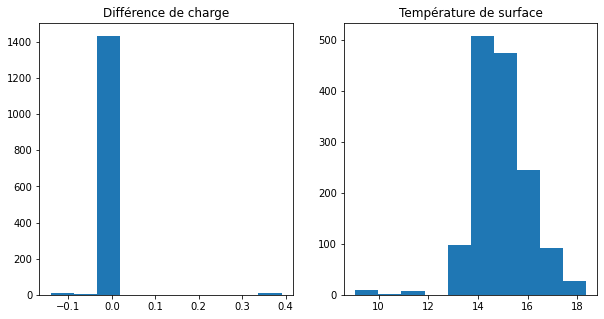

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

data_riv = [capteur_riviere['charge'], capteur_riviere.loc[1:, "temperature_stream_C"]]

titles = ["Différence de charge", "Température de surface"]

for ax, data, title in zip(axes.flatten(), data_riv, titles):
    ax.hist(data)
    ax.set_title(title)

plt.show()

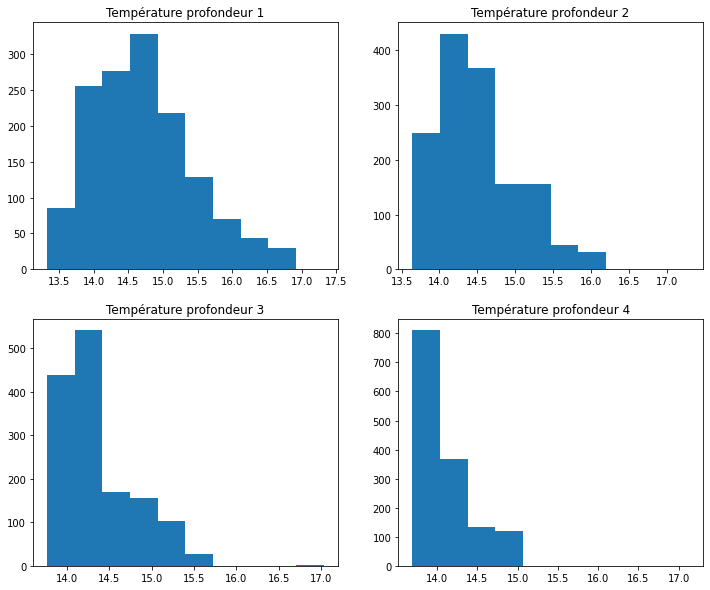

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

data_ZH = [capteur_ZH.loc[1:, column_name] for column_name in capteur_ZH.columns[2:6]]


titles = ["Température profondeur 1", "Température profondeur 2", "Température profondeur 3", "Température profondeur 4"]

for ax, data, title in zip(axes.flatten(), data_ZH, titles):
    ax.hist(data)
    ax.set_title(title)

plt.show()

## 3. Scatterplot

Un nuage de points permet de visualiser la relation entre deux variables quantitatives. Les données sont affichées sous la forme d'une collection de points, et tout point qui ne correspond pas au regroupement général des deux variables peut indiquer des valeurs aberrantes. 

Générez un nuage de points entre les différentes variables de températures. 

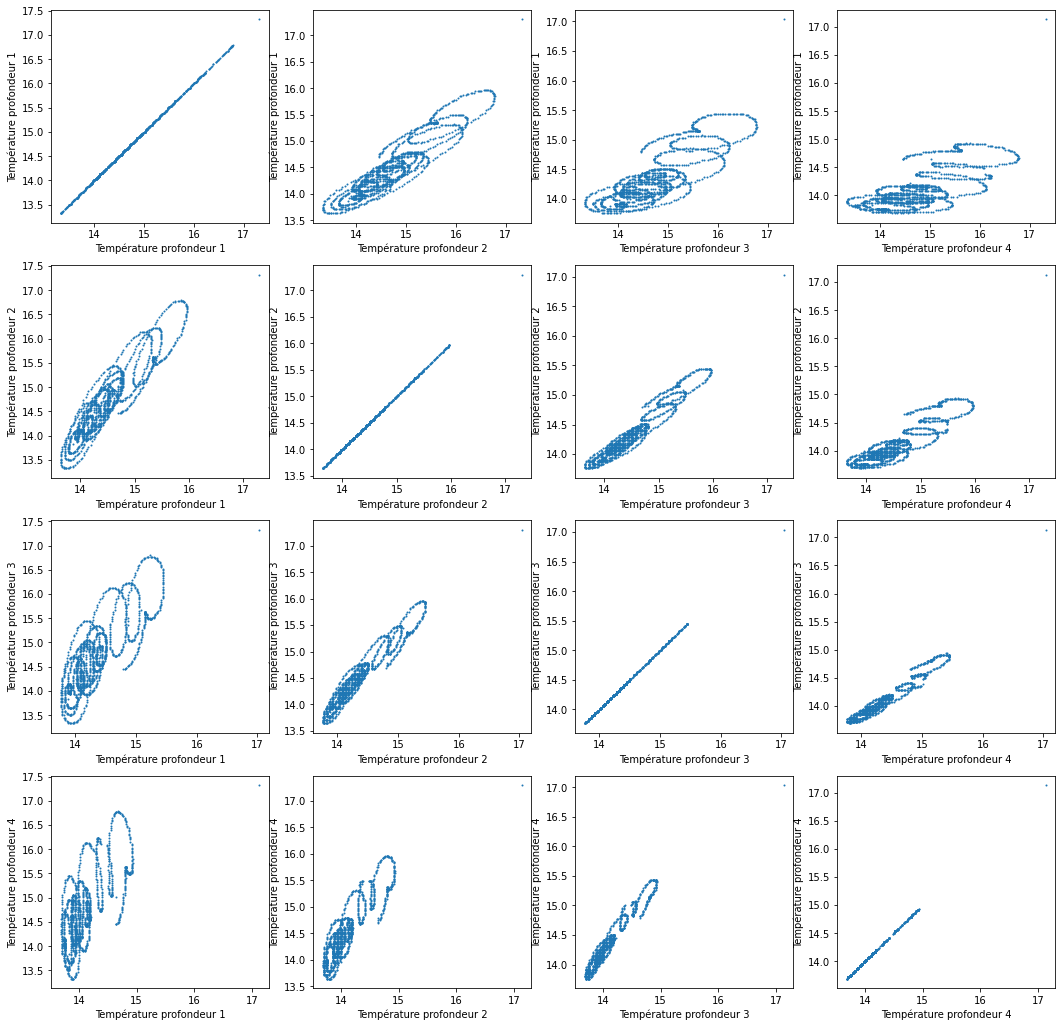

In [47]:
fig, axes = plt.subplots(4, 4, figsize=(18, 18))
names = ['temperature_depth_1_C', 'temperature_depth_2_C',
       'temperature_depth_3_C', 'temperature_depth_4_C']
temperatures = [capteur_ZH.loc[1:, column_name] for column_name in names]

for i, temp_a in enumerate(temperatures):
    j = 1
    for ax, temp_b in zip(axes[i], temperatures):
        ax.scatter(temp_a, temp_b, s=1)
        ax.set_ylabel(f"Température profondeur {i+1}")
        ax.set_xlabel(f"Température profondeur {j}")
        j += 1

plt.show()

## Identification des valeurs aberrantes avec l'écart interquartile (IQR)

L'écart interquartile (IQR) est une mesure de la dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule IQR = Q3 - Q1. Les  lignes de code ci-dessous calculent et impriment l'écart interquartile pour chacune des variables de l'ensemble de données.  La règle générale est que tout ce qui n'est pas dans la plage de (Q1 - 1,5 IQR) et (Q3 + 1,5 IQR) est une valeur aberrante et peut être supprimé.

### Fonctions d'assistance

Ecrire des fonctions afin d'examiner chaque colonne des deux fichiers de données de terain et de calculer les 1er et 3e quartiles, l'intervalle inter-quartile et le minimum et le maximum. Toute valeur en dehors du minimum et du maximum est une valeur aberrante.

Détermination des inter-quartiles:

**1)Capteur_ZH**

In [49]:
IQ=[]
q=[]
Q=[]
for i in range(4) :
    dat = capteur_ZH[f'temperature_depth_{i+1}_C']
    IQ.append( dat.quantile(q=0.75)-dat.quantile(q=0.25))
    q.append(dat.quantile(q=0.25))
    Q.append(dat.quantile(q=0.75))
    
for i , valeur in enumerate(IQ):
    print(f"L'interquartile pour la température {i+1} vaut : {valeur}")

L'interquartile la température 1 vaut : 0.9809999999999999
L'interquartile la température 2 vaut : 0.6699999999999999
L'interquartile la température 3 vaut : 0.45500000000000007
L'interquartile la température 4 vaut : 0.31200000000000117


**2) Cpateur_riviere**

In [51]:
IQ_riv=[]
q_riv=[]
Q_riv=[]
names = ['tension_V','temperature_stream_C','charge']
for e in names :
    dat = capteur_riviere[e]
    IQ_riv.append( dat.quantile(q=0.75)-dat.quantile(q=0.25))
    q_riv.append(dat.quantile(q=0.25))
    Q_riv.append(dat.quantile(q=0.75))

for name, valeur in zip(names, IQ_riv):
    print(f"L'interquartile pour {name} vaut : {valeur}")

L'interquartile pour tension_V vaut : 0.023419999999999996
L'interquartile pour temperature_stream_C vaut : 1.3512500000000003
L'interquartile pour charge vaut : 0.015543125617523332


Nous avons maintenant les listes des valeurs des quartiles et interquartiles de chaque colonne concernée dans les tableaux.Procédons à l'extractionn des valeurs aberrantes:

## Suppression des valeurs aberrantes et visualisation du résultat

Après avoir fait tout le gros du travail dans les fonctions d'assistance, nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de | - et - | moustaches…



**Nouvelles listes de données sans les valeurs aberrantes :**

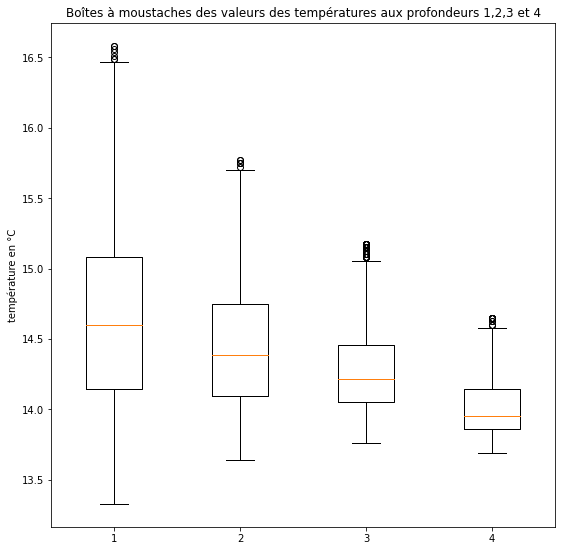

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
data = []
names=[]
for i in range(4):
    dat = capteur_ZH[f'temperature_depth_{i+1}_C'].values 
    dat = dat[(dat > q[i]-1.5*IQ[i]) & (dat<Q[i]+1.5*IQ[i])]
    data.append(dat)
    names.append(f'Temperature à la profondeur {i+1}')
ax.boxplot(data)
plt.ylabel('température en °C')
plt.title('Boîtes à moustaches des valeurs des températures aux profondeurs 1,2,3 et 4')
plt.show()

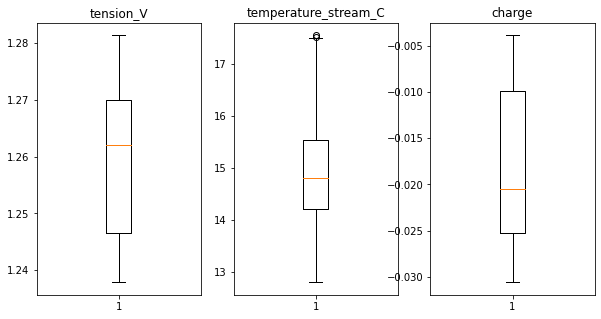

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 5))
data_IQ_riv = []
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','charge']
for i in range(3):
    dat = capteur_riviere[features[i]].values 
    dat = dat[(dat > q_riv[i]-1.5*IQ_riv[i]) & (dat<Q_riv[i]+1.5*IQ_riv[i])]
    ax[i].boxplot(dat)
    ax[i].set_title(features[i])
plt.show()

Tous les cercles sont des valeurs aberrantes qui sont hors de l'intervalle : $[Q1-1.5*IQ, Q3+1.5*IQ]$.

## Expliquez le résultat
Est-ce que cette méthodologie vous semble suffisante? Tentez de trouver les limites de cette méthodologie?
Que pouvez vous apportez aux fonctions afin de les améliorer?

Cette méthode permet d'éliminer les valeurs aberrantes trop éloignées des valeurs habituellement prises. C'est une méthode utile, mais pas suffisante dans certains cas, par exemple lorsque certaines valeurs erreurs restent dans l'intervalle considéré. Ces erreurs peuvent être détectées par exemple en vérifiant que la grandeur ne varie pas trop vite. En effet, si une valeur de température est différente de 5 degrés de ses valeurs voisines alors que le pas de temps est de 30 seconde, on sent qu'il y a un problème, même si cette valeur est comprise entre  et .

Un moyen d'améliorer la fonction pourrait par exemple être de limiter l'écart de valeurs entre grandeurs voisines à qelques fois la précision de l'appareil de mesure.

## Valeurs abérantes avec la méthode score Z 
Il s'agit d'une unité mesurée en écart-type. Fondamentalement, il s'agit d'une mesure de la distance entre le score brut et la moyenne. Il est compris entre -3 et +3, où 0 = moyenne et 1 = écart-type, c'est-à-dire une distribution normale.

Cette méthode suggère qu'en tout point de données il existe une relation entre l'écart-type et la moyenne. Le score Z permet de trouver la distribution des données où la moyenne est égale à 0 et l'écart-type à 1, c'est-à-dire une distribution normale. Vous devez vous demander en quoi cela peut nous aider à identifier les valeurs aberrantes ? En calculant le score Z, nous redimensionnons et centrons les données et recherchons les points de données qui sont trop éloignés de zéro. Ces points de données qui sont trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme aberrant.

Formule pour le score Z = (Observation - Moyenne)/Écart-type

z = (X - μ) / σ

Ecrire des functions afin de pouvoir appliquer cette méthodologie aux données

In [52]:
def std_scaled(X):
    m = X.mean()
    std = X.std()
    res = (X-m)/std
    return res

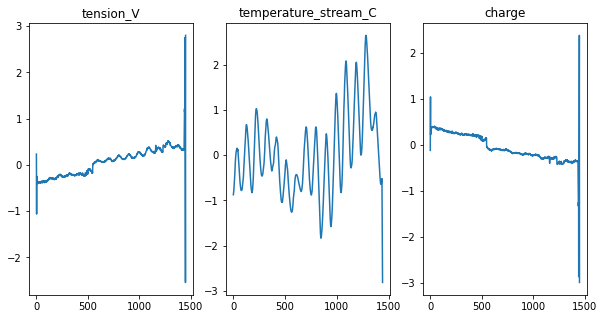

In [53]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 5))
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','charge']
for i in range(3):
    dat = std_scaled(capteur_riviere[features[i]])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].plot(dat)
    ax[i].set_title(features[i])
plt.show()

Il semble y avoir une valeur aberrante en fin de jeu de données pour chaque variable.

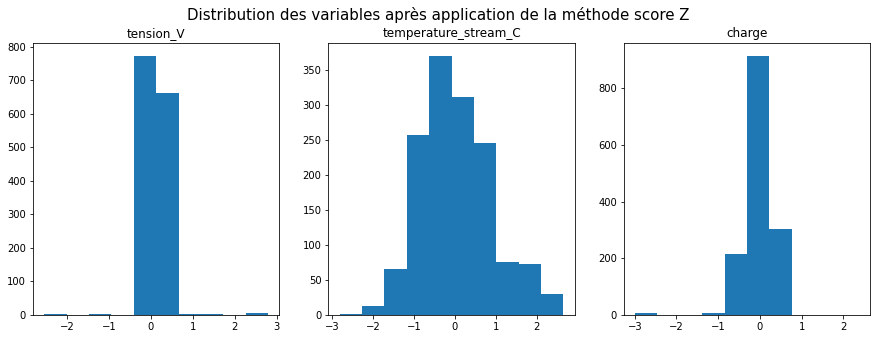

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle("Distribution des variables après application de la méthode score Z", fontsize = 15)
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','charge']
for i in range(3):
    dat = std_scaled(capteur_riviere[features[i]])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].hist(dat)
    ax[i].set_title(features[i])
plt.show()

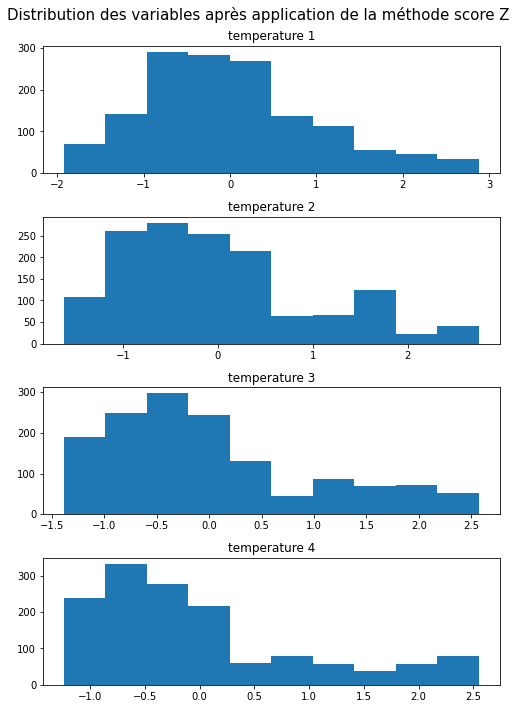

In [87]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4,1, figsize=(7, 10))
fig.suptitle("Distribution des variables après application de la méthode score Z", fontsize = 15)
ax = [ax1,ax2, ax3, ax4]

for i in range(4):
    dat = std_scaled(capteur_ZH[f"temperature_depth_{i+1}_C"])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].hist(dat)
    ax[i].set_title(f"temperature {i+1}")
    fig.tight_layout()
plt.show()


## Comparer les deux méthodologies, donner leurs avantages et leurs limitations
Vous pouvez proposer des alternatives.

## Proposer une fonction permettant d'aller des données brutes jusqu'au traitement des données.

N'oubliez pas de permettre à l'utilisateur de pouvoir prendre des décisions et de l'aider à prendre ces décisions
Pensez à indiquer à l'utilisateur si le jeu de données est utilisable, quels sont les capteurs défaillants, quel semble être l'orientation des échanges nappe-rivière, les données de différence de charge semblent-elles donner les mêmes informations que les données du profil de température.

Votre fonction doit prendre en entrée, les trois fichiers, le nom du point et proposer au fur et à mesure de son déroulé des propositions à l'utilisateur.

# Deux autres jeux de données sont disponibles sur le répertoire github.
Votre rôle est de traiter et d'analyser ces données avec la méthodologie que vous avez développé

## Trouver les valeurs limites